# Exploratory data analysis (EDA) of apartment data

## Libraries and settings

In [52]:
# Libraries
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta

# seaborn graphics settings
sns.set_theme(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/python_exploratory_data_analysis


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [53]:
# Columns to read


# Read and select variables
df_orig = pd.read_csv("/workspaces/python_exploratory_data_analysis/processed_data news.csv")
# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df = df_orig.dropna()
df.head(5)

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range,sold_items
0,apple,Apple iPhone X,Amazon DE,213.85,EUR,231.73,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,Hexa-core 2.39 GHz (2x Monsoon + 4x Mistral),Apple GPU (three-core graphics),2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,high price,121
1,apple,Apple iPhone X,Amazon US,162.90,USD,162.90,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,Hexa-core 2.39 GHz (2x Monsoon + 4x Mistral),Apple GPU (three-core graphics),2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,low price,551
2,samsung,Samsung Galaxy S9+,Amazon DE,117.84,EUR,127.69,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,low price,401
3,samsung,Samsung Galaxy S9+,Amazon DE,279.00,EUR,302.32,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,medium price,140
4,samsung,Samsung Galaxy S9+,Amazon DE,309.04,EUR,334.88,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,high price,458


### Quantiles

In [54]:
# Calculate quantiles
df[['price', 'price_USD', 'storage', 'ram','Weight']].quantile(
    q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,price_USD,storage,ram,Weight
0.05,89.99,99.99,64.0,4.0,166.55
0.10,108.56,120.27,128.0,4.0,172.00
0.25,149.99,167.99,128.0,6.0,183.50
0.50,249.99,279.53,256.0,8.0,193.25
0.75,499.96,551.77,256.0,12.0,204.00
0.90,847.80,929.99,512.0,12.0,221.00
0.95,1059.00,1169.60,512.0,16.0,232.00


### Shape (number of rows and colums)

In [55]:
# Number of rows and columns
print(df.shape)

(1712, 32)


### Data types

In [56]:
df.dtypes

phone_brand            object
phone_model            object
store                  object
price                 float64
currency               object
price_USD             float64
storage                 int64
ram                     int64
Launch                 object
Dimensions             object
Weight                float64
Display_Type           object
Display_Size          float64
Display_Resolution     object
OS                     object
NFC                     int64
USB                    object
BATTERY                 int64
Features_Sensors       object
Colors                 object
Video                  object
Chipset                object
CPU                    object
GPU                    object
Year                    int64
Foldable                int64
PPI_Density             int64
quantile_10            object
quantile_50           float64
quantile_90            object
price_range            object
sold_items              int64
dtype: object

### Summary statistics of numeric variables

In [57]:
df.describe()

,price,price_USD,storage,ram,Weight,Display_Size,NFC,BATTERY,Year,Foldable,PPI_Density,quantile_50,sold_items
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,381.790280,420.554048,271.574766,7.978388,195.212266,6.564977,0.918808,4657.309579,2022.048481,0.048481,404.033294,314.507439,539.566005
std,334.260279,362.104020,207.326353,3.422533,24.714075,0.382821,0.273209,694.083728,1.428395,0.214844,71.483132,114.369988,256.255692
min,49.000000,52.630000,32.000000,2.000000,135.000000,4.700000,0.000000,1821.000000,2017.000000,0.000000,179.000000,197.315000,100.000000
25%,149.990000,167.987500,128.000000,6.000000,183.500000,6.500000,1.000000,4500.000000,2021.000000,0.000000,393.750000,247.180000,317.750000
50%,249.990000,279.530000,256.000000,8.000000,193.250000,6.600000,1.000000,5000.000000,2022.000000,0.000000,402.000000,249.990000,538.500000
75%,499.960000,551.767500,256.000000,12.000000,204.000000,6.700000,1.000000,5000.000000,2023.000000,0.000000,446.000000,330.675000,761.000000
max,2179.460000,2361.660000,1000.000000,24.000000,627.000000,12.400000,1.000000,10200.000000,2024.000000,1.000000,643.000000,552.385000,1000.000000


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [58]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Weight:',
      'Count:', round(df.Weight.count(), 1),
      'Min:', round(df.Weight.min(), 1),
      'Max:', round(df.Weight.max(), 1),
      'Mean:', round(df.Weight.mean(), 1),
      'Median:', round(df.Weight.median(), 1),
      'Std:', round(df.Weight.std(), 1))

Price: Count: 1712 Min: 49.0 Max: 2179.5 Mean: 381.8 Median: 250.0 Std: 334.3
Weight: Count: 1712 Min: 135.0 Max: 627.0 Mean: 195.2 Median: 193.2 Std: 24.7


### Skewness

In [59]:
df[['price','Weight']].skew()

price     1.879928
Weight    5.261809
dtype: float64


The skewness values indicate the following:

Price (skew = 1.88): The distribution is right-skewed, meaning most cars have lower prices, but a few high-priced cars pull the average up.

Weight (skew = 5.26): A strong right skew, indicating most cars are lighter, but a few heavy cars (e.g., SUVs) create a long right tail.

Summary:
Both price and Weight are right-skewed, meaning outliers on the higher end are affecting the mean. Median values may better represent central tendency.

### Kurtosis

In [60]:
df[['price','Weight']].kurtosis()

price      4.114288
Weight    75.408553
dtype: float64

The kurtosis values you provided for the price and Weight columns indicate the following:

Price (kurtosis = 4.11): A kurtosis value greater than 3 suggests a leptokurtic distribution, meaning the distribution has heavy tails and a sharp peak compared to a normal distribution. In the context of smartphones, this suggests that most prices are clustered around a central value, with a few extremely high-priced outliers (like premium models).

Weight (kurtosis = 75.41): A very high kurtosis value like 75.41 indicates a highly leptokurtic distribution, meaning the data has a very sharp peak and extreme outliers. For smartphones, this could indicate that most devices are close in weight, but there are some devices with significantly heavier or lighter weights (perhaps due to differences in size or battery capacity).

Summary:
Price shows a moderately peaked distribution with a few expensive outliers.
Weight has an extremely peaked distribution with noticeable outliers.

### Extreme values

In [61]:
# Low costs apartments
df[df['price_USD'] <= 100]

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range,sold_items
107,vivo,vivo Y50,AliExpress,69.30,USD,69.30,128,8,2020-04-12,162 x 76.5 x 9.1 mm (6.38 x 3.01 x 0.36 in),...,Octa-core (4x2.0 GHz Kryo 260 Gold & 4x1.8 GHz...,Adreno 610,2020,0,403,10.109.599.999.999.900,197.460,493.332,low price,197
115,apple,Apple iPhone SE (2020),Amazon US,99.64,USD,99.64,128,3,2020-04-24,138.4 x 67.3 x 7.3 mm (5.45 x 2.65 x 0.29 in),...,Hexa-core (2x2.65 GHz Lightning + 4x1.8 GHz Th...,Apple GPU (4-core graphics),2020,0,326,10.109.599.999.999.900,197.460,493.332,low price,642
139,xiaomi,Xiaomi Redmi Note 9,AliExpress,85.50,USD,85.50,128,4,2020-05-12,162.3 x 77.2 x 8.9 mm (6.39 x 3.04 x 0.35 in),...,Octa-core (2x2.0 GHz Cortex-A75 & 6x1.8 GHz Co...,Mali-G52 MC2,2020,0,395,10.109.599.999.999.900,197.460,493.332,low price,326
148,xiaomi,Xiaomi Redmi 9,AliExpress,66.11,USD,66.11,64,4,2020-06-10,163.3 x 77 x 9.1 mm (6.43 x 3.03 x 0.36 in),...,Octa-core (2x2.0 GHz Cortex-A75 & 6x1.8 GHz Co...,Mali-G52 MC2,2020,0,395,10.109.599.999.999.900,197.460,493.332,low price,254
153,xiaomi,Xiaomi Redmi 9A,Amazon DE,61.44,EUR,66.58,32,3,2020-07-07,164.9 x 77.1 x 9 mm (6.49 x 3.04 x 0.35 in),...,Octa-core (4x2.0 GHz Cortex-A53 & 4x1.5 GHz Co...,PowerVR GE8320,2020,0,269,10.109.599.999.999.900,197.460,493.332,low price,864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,xiaomi,Xiaomi Redmi A3,Amazon DE,72.51,EUR,78.57,128,4,2024-02-23,168.3 x 76.3 x 8.3 mm (6.63 x 3.00 x 0.33 in),...,Octa-core (4x2.2 GHz Cortex-A53 & 4x1.6 GHz Co...,PowerVR GE8320,2024,0,268,161.756,552.385,1.380.286,low price,285
1518,xiaomi,Xiaomi Redmi A3,Amazon US,84.50,USD,84.50,128,4,2024-02-23,168.3 x 76.3 x 8.3 mm (6.63 x 3.00 x 0.33 in),...,Octa-core (4x2.2 GHz Cortex-A53 & 4x1.6 GHz Co...,PowerVR GE8320,2024,0,268,161.756,552.385,1.380.286,low price,376
1519,xiaomi,Xiaomi Redmi A3,Amazon US,94.00,USD,94.00,128,6,2024-02-23,168.3 x 76.3 x 8.3 mm (6.63 x 3.00 x 0.33 in),...,Octa-core (4x2.2 GHz Cortex-A53 & 4x1.6 GHz Co...,PowerVR GE8320,2024,0,268,161.756,552.385,1.380.286,low price,386
1562,motorola,Motorola Moto G04s,Amazon DE,92.06,EUR,99.76,128,4,2024-04-29,163.5 x 74.5 x 8 mm (6.44 x 2.93 x 0.31 in),...,Octa-core (2x1.6 GHz Cortex-A75 & 6x1.6 GHz Co...,Mali-G57 MP1,2024,0,269,161.756,552.385,1.380.286,low price,771


In [62]:
# Very expansive apartments
df[df['price_USD'] >= 1000]

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range,sold_items
275,samsung,Samsung Galaxy S21 Ultra 5G,Amazon US,1499.00,USD,1499.00,512,16,2021-01-29,165.1 x 75.6 x 8.9 mm (6.5 x 2.98 x 0.35 in),...,Octa-core (1x2.9 GHz Cortex-X1 & 3x2.80 GHz Co...,Mali-G78 MP14 - International,2021,0,515,127.5,249.990,584.15,high price,620
353,asus,Asus ROG Phone 5,Amazon UK,899.00,GBP,1169.60,128,12,2021-04-26,172.8 x 77.3 x 10.3 mm (6.80 x 3.04 x 0.41 in),...,Octa-core (1x2.84 GHz Cortex-X1 & 3x2.42 GHz C...,Adreno 660,2021,0,395,127.5,249.990,584.15,high price,786
449,samsung,Samsung Galaxy Z Fold3 5G,Samsung,1799.99,USD,1799.99,512,12,2021-08-27,Unfolded: 158.2 x 128.1 x 6.4 mm,...,Octa-core (1x2.84 GHz Cortex-X1 & 3x2.42 GHz C...,Adreno 660,2021,1,374,127.5,249.990,584.15,high price,173
662,oppo,Oppo Find X5 Pro,Amazon US,1070.00,USD,1070.00,256,12,2022-03-14,163.7 x 73.9 x 8.5 or 8.8 mm,...,Octa-core (1x3.00 GHz Cortex-X2 & 3x2.50 GHz C...,Adreno 730 - Global,2022,0,525,114.99,247.180,793.2,high price,946
764,zte,ZTE Axon 40 Ultra,Amazon UK,899.00,GBP,1169.60,256,8,2022-05-13,163.3 x 73.6 x 8.4 mm (6.43 x 2.90 x 0.33 in),...,Octa-core (1x3.00 GHz Cortex-X2 & 3x2.50 GHz C...,Adreno 730,2022,0,400,114.99,247.180,793.2,high price,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,apple,Apple iPhone 16 Pro,Amazon UK,1299.00,GBP,1690.00,512,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),...,Hexa-core (2x4.05 GHz + 4x2.42 GHz),Apple GPU (6-core graphics),2024,0,460,161.756,552.385,1.380.286,high price,623
1698,apple,Apple iPhone 16,Amazon UK,799.00,GBP,1039.50,256,8,2024-09-20,147.6 x 71.6 x 7.8 mm (5.81 x 2.82 x 0.31 in),...,Hexa-core (2x4.04 GHz + 4x2.20 GHz),Apple GPU (5-core graphics),2024,0,460,161.756,552.385,1.380.286,medium price,274
1699,apple,Apple iPhone 16,Amazon UK,899.00,GBP,1169.60,512,8,2024-09-20,147.6 x 71.6 x 7.8 mm (5.81 x 2.82 x 0.31 in),...,Hexa-core (2x4.04 GHz + 4x2.20 GHz),Apple GPU (5-core graphics),2024,0,460,161.756,552.385,1.380.286,medium price,792
1700,apple,Apple iPhone 16 Plus,Amazon UK,899.00,GBP,1169.60,256,8,2024-09-20,160.9 x 77.8 x 7.8 mm (6.33 x 3.06 x 0.31 in),...,Hexa-core (2x4.04 GHz + 4x2.20 GHz),Apple GPU (5-core graphics),2024,0,460,161.756,552.385,1.380.286,medium price,276


In [63]:
df['is_apple'] = df['phone_model'].apply(lambda x: 1 if 'Apple' in x else 0)

print(df['is_apple'])

0       1
1       1
2       0
3       0
4       0
       ..
1710    0
1711    0
1712    0
1713    0
1714    0
Name: is_apple, Length: 1712, dtype: int64


### Get a list of categories of categorical variable

In [64]:
np.array(pd.Categorical(df['phone_model']).categories)

array(['8', 'Apple iPhone 11', 'Apple iPhone 11 Pro',
       'Apple iPhone 11 Pro Max', 'Apple iPhone 12',
       'Apple iPhone 12 Pro', 'Apple iPhone 12 Pro Max',
       'Apple iPhone 12 mini', 'Apple iPhone 13', 'Apple iPhone 13 Pro',
       'Apple iPhone 13 Pro Max', 'Apple iPhone 13 mini',
       'Apple iPhone 14', 'Apple iPhone 14 Plus', 'Apple iPhone 14 Pro',
       'Apple iPhone 14 Pro Max', 'Apple iPhone 15',
       'Apple iPhone 15 Plus', 'Apple iPhone 15 Pro',
       'Apple iPhone 15 Pro Max', 'Apple iPhone 16',
       'Apple iPhone 16 Plus', 'Apple iPhone 16 Pro',
       'Apple iPhone 16 Pro Max', 'Apple iPhone SE (2020)',
       'Apple iPhone SE (2022)', 'Apple iPhone X', 'Apple iPhone XR',
       'Apple iPhone XS', 'Apple iPhone XS Max', 'Asus ROG Phone 5',
       'Asus ROG Phone 6', 'Asus ROG Phone 7', 'Asus ROG Phone 8',
       'Asus ROG Phone 8 Pro', 'Asus Zenfone 10', 'Asus Zenfone 11 Ultra',
       'Asus Zenfone 8', 'Asus Zenfone 9', 'Blackview A96',
       'Cubot Kin

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [65]:
pd.crosstab(df['is_apple'], df['ram'])

ram,2,3,4,6,8,12,16,24
is_apple,,,,,,,,
0,5,49,252,235,527,361,86,3
1,0,14,60,77,43,0,0,0


### Pivot tables

In [66]:
# Using pivot_table to reshape the data and calculate means
pd.pivot_table(df[['ram', 'price', 'Weight', 'is_apple']],
               index=['price', 'is_apple'],
               values=['price', 'Weight', 'ram'],
               aggfunc=(np.mean, 'count'))

Weight          ram      
                  count   mean count  mean
price   is_apple                          
49.00   0             1  192.0     1   3.0
52.63   0             1  196.0     1   4.0
54.99   0             1  192.0     1   3.0
56.87   0             1  195.1     1   4.0
57.00   0             1  194.0     1   4.0
...                 ...    ...   ...   ...
1919.99 0             2  258.0     2  12.0
1959.00 0             1  226.0     1  12.0
1999.00 0             1  190.0     1  12.0
2019.99 0             1  239.0     1  12.0
2179.46 0             1  239.0     1  12.0

[1292 rows x 4 columns]

### Correlation matrix

In [67]:
corr = df[['price', 
          'Weight', 
          'ram',
          'is_apple'
          ]].corr()
corr

,price,Weight,ram,is_apple
price,1.000000,0.347651,0.545570,0.209228
Weight,0.347651,1.000000,0.266059,-0.036410
ram,0.545570,0.266059,1.000000,-0.247639
is_apple,0.209228,-0.036410,-0.247639,1.000000



Here’s how to interpret the correlation matrix:

Price and Weight (0.35): There is a weak positive correlation between price and weight. Heavier phones tend to be slightly more expensive, but the relationship is not very strong.

Price and RAM (0.55): There is a moderate positive correlation between price and RAM. Phones with more RAM tend to be priced higher, though other factors may also influence the price.

Price and is_apple (0.21): There is a weak positive correlation between price and whether the phone is an Apple device. Apple phones tend to be slightly more expensive, but this is not a strong relationship.

Weight and RAM (0.27): There is a weak positive correlation between weight and RAM. Heavier phones may slightly correlate with having more RAM, but the relationship is not significant.

Weight and is_apple (-0.04): There is a very weak negative correlation between weight and whether the phone is Apple. Apple phones are not noticeably heavier or lighter than others.

RAM and is_apple (-0.25): There is a weak negative correlation between RAM and whether the phone is an Apple device. Apple phones tend to have slightly less RAM, though the relationship is weak.

In summary, the most notable correlation is between price and RAM, while the relationships between weight, RAM, and whether a phone is Apple are quite weak.




### Covariance matrix

In [68]:
cov = df[['price_USD', 
          'is_apple', 
          'Weight', 
          'ram']].cov()
cov

,price_USD,is_apple,Weight,ram
price_USD,131119.321129,24.668109,3097.085533,687.670760
is_apple,24.668109,0.100536,-0.285318,-0.268736
Weight,3097.085533,-0.285318,610.785495,22.504532
ram,687.670760,-0.268736,22.504532,11.713735


Price_USD and Weight (3097.09): Positive covariance, indicating that heavier phones tend to be more expensive.
Price_USD and RAM (687.67): Positive covariance, suggesting phones with more RAM are priced higher.
is_apple and Price_USD (24.67): Small positive covariance, indicating Apple phones are slightly more expensive.
is_apple and Weight (-0.29): Small negative covariance, suggesting Apple phones are slightly lighter.
is_apple and RAM (-0.27): Small negative covariance, indicating Apple phones might have slightly less RAM.
Weight and RAM (22.50): Weak positive covariance, indicating heavier phones tend to have slightly more RAM.
In summary, price correlates more with weight and RAM, while the relationship with Apple devices is weak.

A "good" covariance depends on the context and the strength of the relationship you're trying to identify. Here are some guidelines:

Strong Positive Covariance: A large positive covariance (e.g., > 1000) suggests that two variables increase together in a strong, consistent manner. For example, a strong covariance between price_USD and weight or RAM would suggest a meaningful relationship between these variables.

Weak Covariance: Small values close to 0 (e.g., between -10 and 10) suggest that there is little to no linear relationship between the variables. In this case, the variables are not strongly influencing each other.

Negative Covariance: A strong negative covariance (e.g., <-1000) indicates that as one variable increases, the other tends to decrease. A small negative covariance (e.g., -0.29) indicates a very weak inverse relationship.

In general, larger values of covariance (in either positive or negative directions) indicate stronger relationships, while values close to zero indicate weak or no relationships. For most practical purposes, covariance values should be interpreted relative to the scale of the data you're working with.

## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

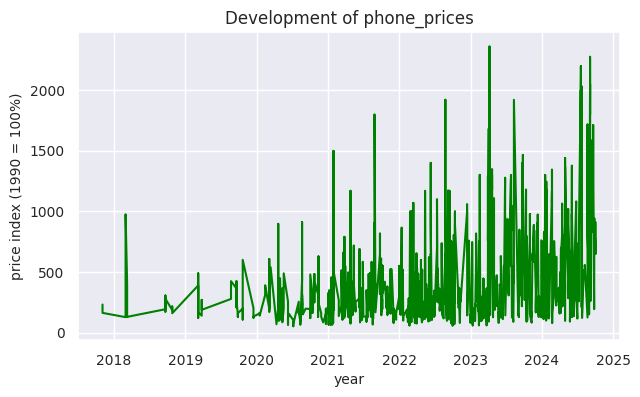

In [69]:
# Generate time series data for rental apartment prices over the last 20 years with an increasing trend


sub_df = df[['Launch', 'price_USD']]

# Convert 'Launch' column to datetime (if it's not already)
sub_df['Launch'] = pd.to_datetime(sub_df['Launch'])
sub_df = sub_df.sort_values(by='Launch', ascending=True)

x=sub_df['Launch']
y=sub_df['price_USD']


# Create a DataFrame to display the data
rental_prices_trend_df = pd.DataFrame({
    "Year": df['Launch'],
    "Rental Price (USD)": df['price_USD']
})


# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of phone_prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='price_USD'>

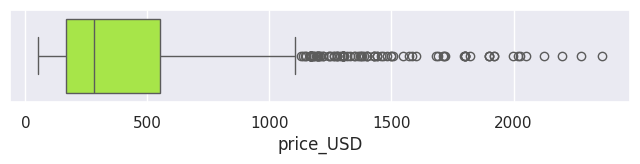

In [70]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price_USD'], color="greenyellow")

### Histogram  (matplotlib)

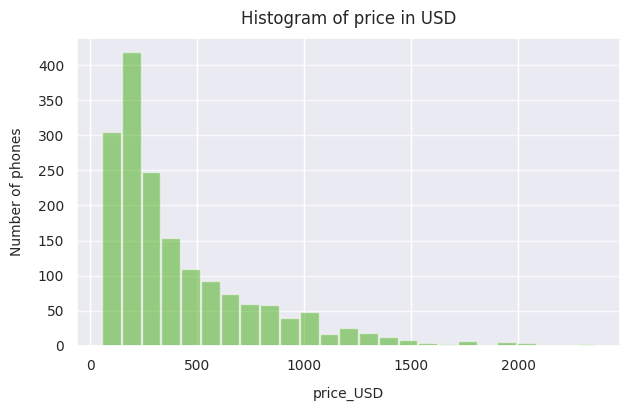

In [71]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_USD'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_USD', fontsize=10, labelpad=10)
plt.ylabel('Number of phones', fontsize=10, labelpad=10)
plt.title('Histogram of price in USD', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

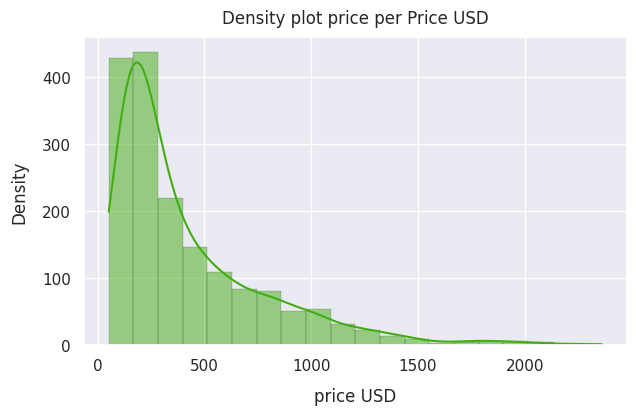

In [72]:
plt.figure(figsize=(7,4))
sns.histplot(df['price_USD'], 
             bins=20, 
             color='#42AD12',
             alpha=0.5,
             kde=True, 
             edgecolor='black', 
             linewidth=0.1)

plt.title('Density plot price per Price USD', fontsize=12, pad=10)
plt.xlabel('price USD', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

This density chart represents the distribution of the price_USD variable in your dataset. Here's a breakdown of what each component shows:

Histogram (bars):

The histogram with bins=20 shows the frequency distribution of price_USD in 20 equal intervals (bins). Each bar represents the number of data points (e.g., phones) falling into each price range.
The color (#42AD12) and alpha (transparency) make the bars semi-transparent, allowing the density curve to be visible behind them.
Kernel Density Estimate (KDE):

The smooth line (kde=True) is the density curve, which estimates the probability density function of the price_USD data. It gives you an idea of the distribution of values, showing the shape of the data (e.g., whether it's skewed, bimodal, etc.).
This curve is smoothed to give a continuous estimate of the data's distribution, unlike the discrete bars of the histogram.
Axis labels:

The x-axis represents the price in USD (price_USD), showing the range of prices in your dataset.
The y-axis represents density, which is a measure of how much the data is concentrated in a particular price range. Higher density values mean there are more data points in that price range.
Grid and Title:

The grid (plt.grid(True)) helps to visually estimate the density values and bar heights.
The title and axis labels describe the chart, indicating that it is a density plot of price_USD.
Interpretation:
The histogram shows how price_USD is distributed across the dataset.
The KDE curve helps to visualize the general shape of the price distribution, smoothing out any noise in the histogram.
This chart helps to see patterns like skewness, concentration of values, or any gaps in the data. For example, if the curve is skewed to the right, it indicates that most prices are on the lower end, with some higher outliers.

### Quantile-Quantile (QQ-) plot

      price_USD       var
156       52.63 -1.016073
942       56.87 -1.004363
1114      59.50 -0.997100
1032      59.95 -0.995858
627       59.98 -0.995775
...         ...       ...
1667    2049.08  4.497398
1626    2122.77  4.700903
1627    2197.39  4.906977
1669    2275.45  5.122550
1152    2361.66  5.360631

[1712 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

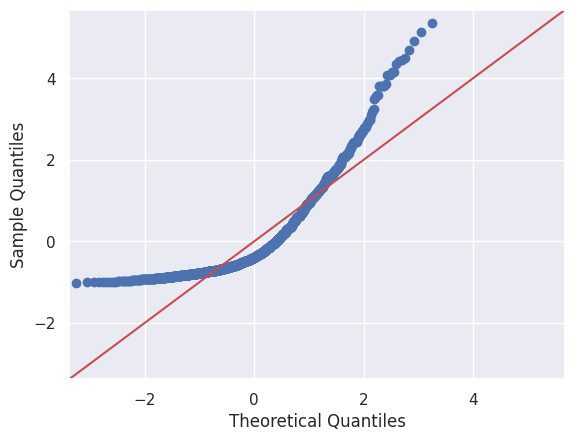

In [73]:
# Variable (standardized)
x = 'price_USD'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['price_USD', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
plt.show

The code you've provided is used to standardize the price_USD variable and then create a Q-Q plot to assess the distribution of the data. Here’s how to interpret the output and plot:

Data Transformation:
Standardization:
The line df_qq['var'] = (df[x]-df[x].mean()) / df[x].std() standardizes the price_USD variable. This transformation scales the data such that the new variable (var) has a mean of 0 and a standard deviation of 1.
The negative values indicate that the corresponding price_USD values are below the mean, while positive values indicate that the corresponding prices are above the mean.
Sorted Data:
The print(df_qq.sort_values('var')[['price_USD', 'var']]) part shows the standardized values along with the original price_USD. The sorted list displays price_USD values in increasing order of their standardized score (var).
Q-Q Plot:
Q-Q Plot:
sm.qqplot(df_qq['var'], line ='45'): This generates a Quantile-Quantile (Q-Q) plot comparing the standardized data (var) to a normal distribution.
The x-axis represents the quantiles of a normal distribution.
The y-axis represents the quantiles of your data (the standardized price_USD).
The line ('45') represents a 45-degree reference line, which shows where the points would lie if your data were perfectly normally distributed.
Interpretation of the Q-Q Plot:
Points on the Line: If the points lie close to the reference line, it suggests that the data follows a normal distribution.
Points Above or Below the Line: If the points deviate significantly from the line, it indicates that the data does not follow a normal distribution.
Above the Line: Indicates that your data has heavy tails or is more spread out than a normal distribution (i.e., it may have extreme outliers).
Below the Line: Indicates that your data has lighter tails than a normal distribution (i.e., fewer extreme values).
Curved Pattern: A curved pattern, either bending upwards or downwards, suggests skewness in the data. For instance, an upward curve suggests the data is right-skewed (many small values with a few large ones), while a downward curve suggests left-skewed data.
Summary:
If the points closely follow the 45-degree reference line, your standardized price_USD values approximate a normal distribution.
Significant deviations from the line suggest that the price_USD data might not be normally distributed, and could have skewness or outliers.

### Barchart  (matplotlib)

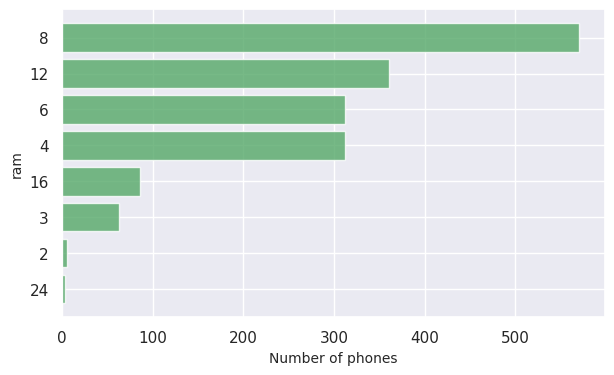

In [74]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['ram'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of phones', fontsize=10)
ax.set_ylabel('ram', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

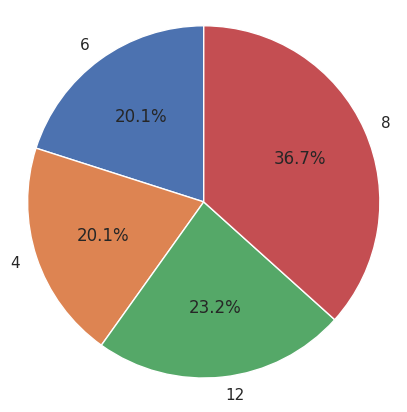

In [75]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.ram.value_counts().nlargest(4).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

In [76]:
df

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range,sold_items,is_apple,var
0,apple,Apple iPhone X,Amazon DE,213.85,EUR,231.73,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,high price,121,1,-0.521464
1,apple,Apple iPhone X,Amazon US,162.90,USD,162.90,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,low price,551,1,-0.711547
2,samsung,Samsung Galaxy S9+,Amazon DE,117.84,EUR,127.69,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,2018,0,529,14.129.600.000.000.000,214.560,311.688,low price,401,0,-0.808784
3,samsung,Samsung Galaxy S9+,Amazon DE,279.00,EUR,302.32,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,2018,0,529,14.129.600.000.000.000,214.560,311.688,medium price,140,0,-0.326520
4,samsung,Samsung Galaxy S9+,Amazon DE,309.04,EUR,334.88,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,2018,0,529,14.129.600.000.000.000,214.560,311.688,high price,458,0,-0.236601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,samsung,Samsung Galaxy S24 FE,Amazon US,709.99,USD,709.99,512,8,2024-10-03,162 x 77.3 x 8 mm (6.38 x 3.04 x 0.31 in),...,2024,0,385,161.756,552.385,1.380.286,medium price,560,0,0.799317
1711,samsung,Samsung Galaxy S24 FE,Samsung,649.99,USD,649.99,256,8,2024-10-03,162 x 77.3 x 8 mm (6.38 x 3.04 x 0.31 in),...,2024,0,385,161.756,552.385,1.380.286,medium price,140,0,0.633619
1712,samsung,Samsung Galaxy S24 FE,Samsung,709.99,USD,709.99,512,8,2024-10-03,162 x 77.3 x 8 mm (6.38 x 3.04 x 0.31 in),...,2024,0,385,161.756,552.385,1.380.286,medium price,158,0,0.799317
1713,samsung,Samsung Galaxy S24 FE,Amazon UK,649.00,GBP,844.35,256,8,2024-10-03,162 x 77.3 x 8 mm (6.38 x 3.04 x 0.31 in),...,2024,0,385,161.756,552.385,1.380.286,medium price,416,0,1.170371


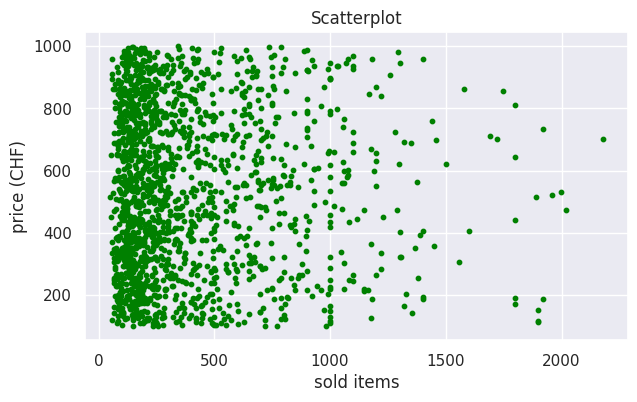

In [80]:
plt.figure(figsize=(7,4))
plt.scatter(df['price'], 
           df['sold_items'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('sold items')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(1625, 34)
-0.027789001338475
453.62832326651426


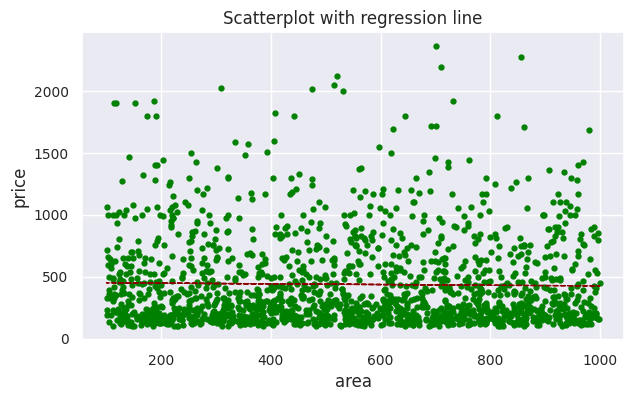

In [81]:
# Subset
df_sub = df.loc[(df.price_USD >= 100)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.sold_items, 
         df_sub.price_USD, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.sold_items, df_sub.price_USD, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.sold_items, 
         b*df_sub.sold_items + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

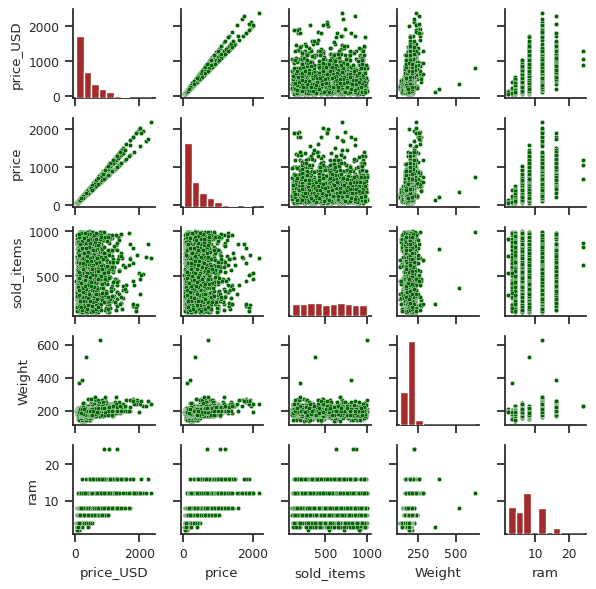

In [82]:
sns.set_theme(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['price_USD', 
                     'price', 
                     'sold_items', 
                     'Weight',
                     'ram']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(1580, 34)


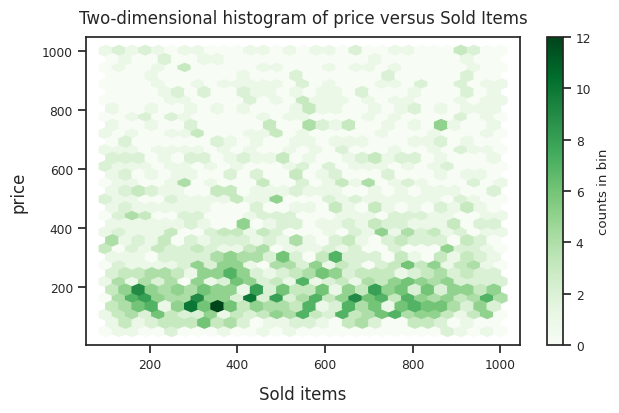

In [87]:
# Subset
df_sub = df.loc[(df.price_USD <= 1000) & (df.sold_items <= 1000)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.sold_items, df_sub.price_USD, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('Sold items', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus Sold Items', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

            price_USD  sold_items  Weight   ram
price_USD        1.00       -0.01    0.35  0.55
sold_items      -0.01        1.00    0.01 -0.01
Weight           0.35        0.01    1.00  0.27
ram              0.55       -0.01    0.27  1.00


<Axes: >

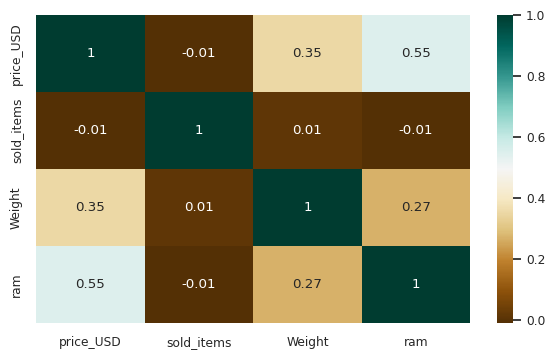

In [89]:
# Set font size for plot
sns.set_theme(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
corr = df[['price_USD', 
                      
                     'sold_items', 
                     'Weight',
                     'ram']].corr().round(2)
print(corr)

# Plot heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

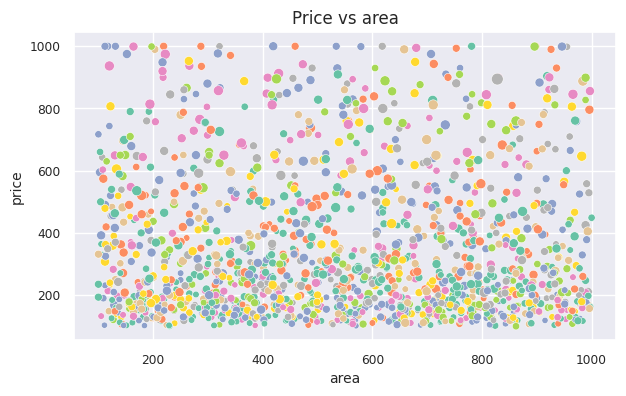

In [90]:
# Subset of df
df_sub = df.loc[(df['price_USD'] >= 100) & (df['price_USD'] <= 1000)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="sold_items", 
                     y="price_USD",
                     size="ram", # determines bubble size
                     hue="Weight",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-09 14:09:18
Python Version: 3.11.10
-----------------------------------
